In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the housing dataset

#df_ad_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/merged_datasets.csv')
df_ad_housing = pd.read_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/Additional_Dataset_wo_null_ayushya.csv', index_col=0)
df_ad_housing.head()
#df_ad_housing.head()

,price,house_type_2,rooms,m2,elevator,garage,neighborhood,district,house_type_,floor
0,495000,exterior,3,118.0,True,True,Chopera,Arganzuela,Apartment,1
1,485000,exterior,2,82.0,True,True,Palos de Moguer,Arganzuela,Apartment,2
2,315000,exterior,2,72.0,False,False,Legazpi,Arganzuela,Apartment,2
3,585000,exterior,2,174.0,True,True,Palos de Moguer,Arganzuela,Apartment,4
4,255000,exterior,3,75.0,False,False,Acacias,Arganzuela,bajo,0


#### Basic Analysis

In [3]:
df_ad_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12391 entries, 0 to 15974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12391 non-null  int64  
 1   house_type_2  12391 non-null  object 
 2   rooms         12391 non-null  int64  
 3   m2            12391 non-null  float64
 4   elevator      12391 non-null  bool   
 5   garage        12391 non-null  bool   
 6   neighborhood  12391 non-null  object 
 7   district      12391 non-null  object 
 8   house_type_   12391 non-null  object 
 9   floor         12391 non-null  int64  
dtypes: bool(2), float64(1), int64(3), object(4)
memory usage: 895.4+ KB


In [4]:
df_ad_housing.columns

Index(['price', 'house_type_2', 'rooms', 'm2', 'elevator', 'garage',
       'neighborhood', 'district', 'house_type_', 'floor'],
      dtype='object')

<Axes: xlabel='house_type_2', ylabel='count'>

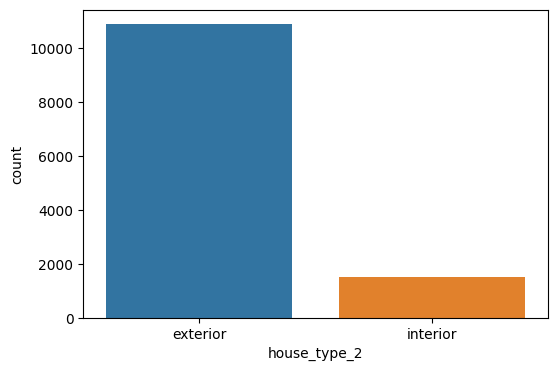

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='house_type_2',data=df_ad_housing)


<Axes: xlabel='elevator', ylabel='count'>

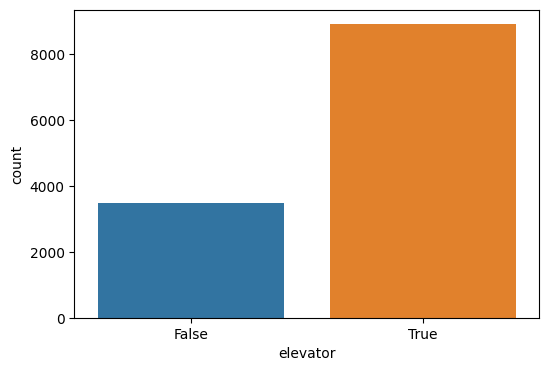

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='elevator',data=df_ad_housing)

<Axes: xlabel='garage', ylabel='count'>

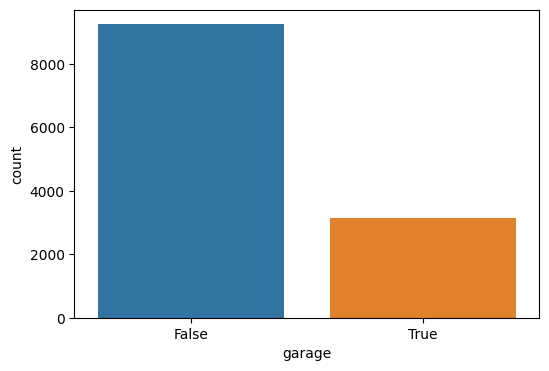

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(x='garage',data=df_ad_housing)

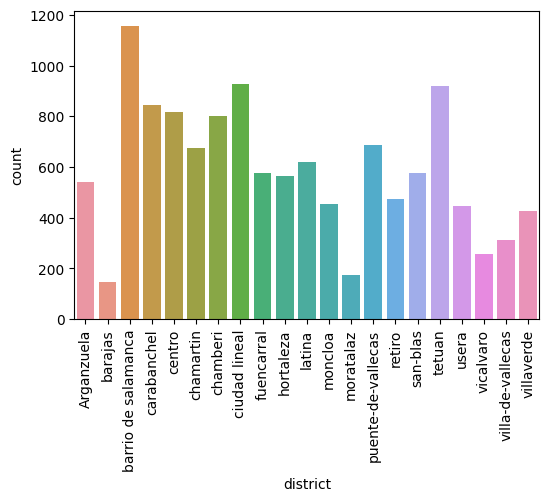

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='district',data=df_ad_housing)
plt.xticks(rotation = 90)
plt.show()

In [9]:
import unicodedata
import re

# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name

# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the functions
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].str.lower()
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].apply(remove_digits)
df_ad_housing['neighborhood'] = df_ad_housing['neighborhood'].apply(remove_accents)




/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


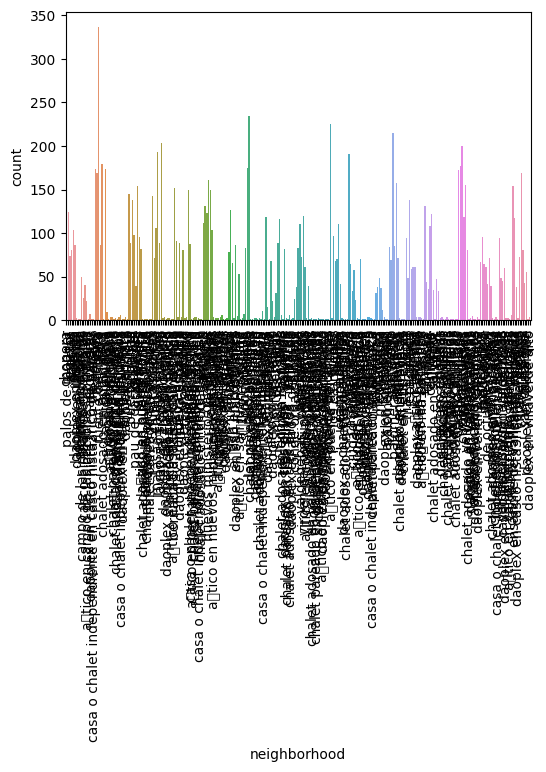

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='neighborhood',data=df_ad_housing)
plt.xticks(rotation = 90)
plt.show()

#### Advanced Analysis

<Axes: >

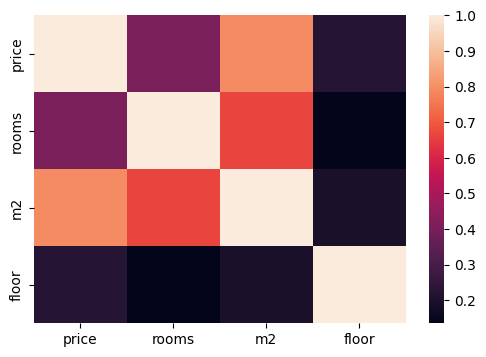

In [11]:
numeric_cols = df_ad_housing.select_dtypes(include=['float64','int64']).columns
df_ad_housing[numeric_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(df_ad_housing[numeric_cols].corr())

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


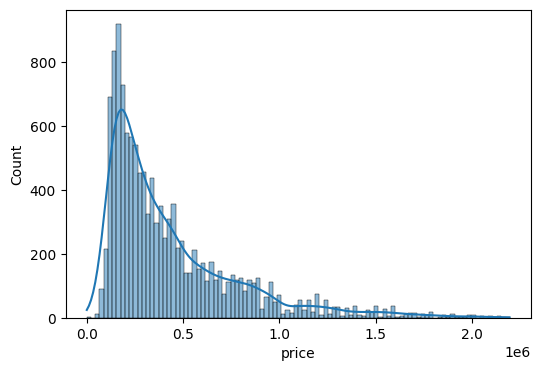

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


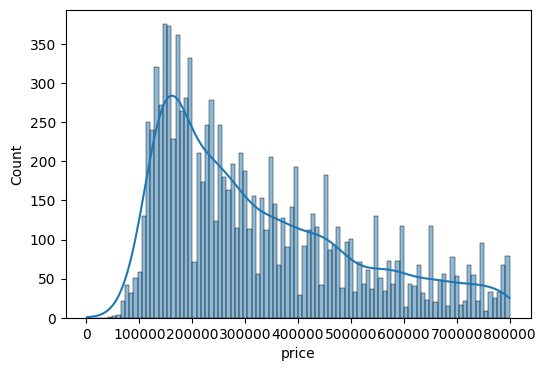

In [13]:
q = df_ad_housing['price'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['price']<800000]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['price'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


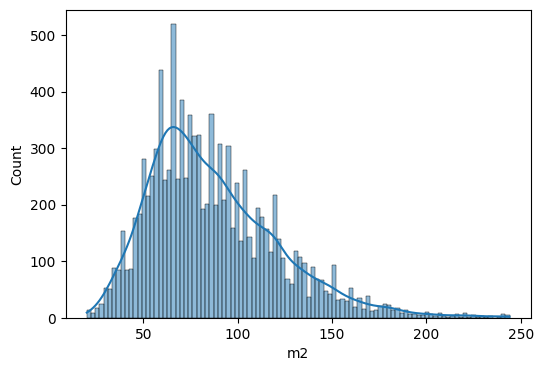

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['m2'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


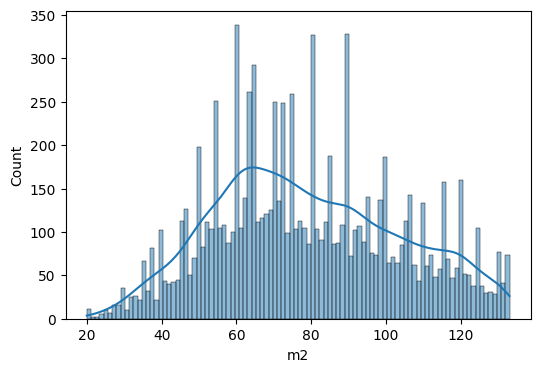

In [15]:
q = df_ad_housing['m2'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['m2']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['m2'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


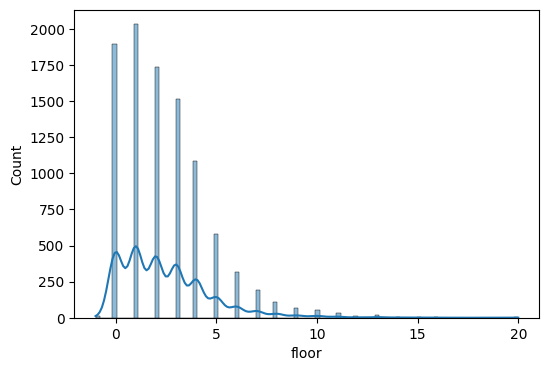

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


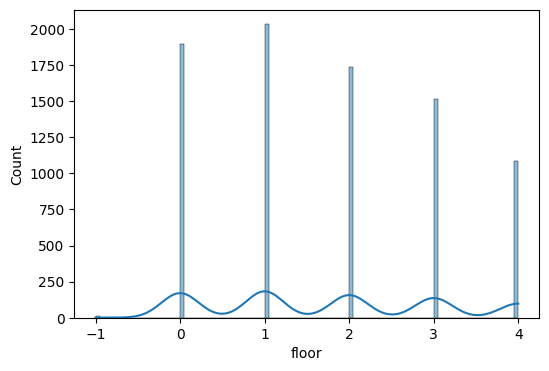

In [17]:
q = df_ad_housing['floor'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['floor']<q]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['floor'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


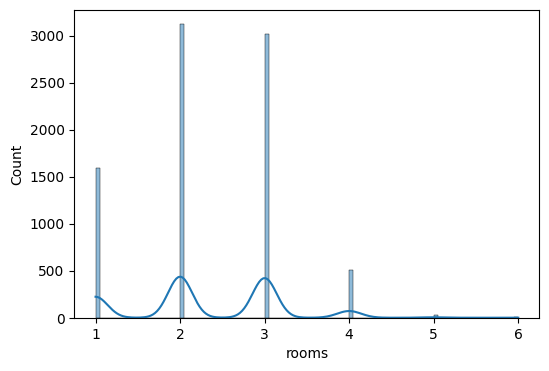

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['rooms'],bins=100, kde=True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


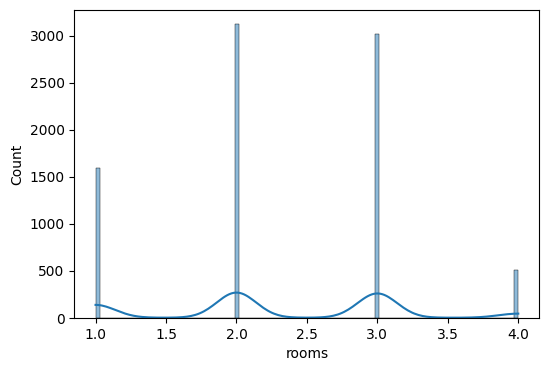

In [19]:
q = df_ad_housing['rooms'].quantile(0.9)

df_ad_housing = df_ad_housing[df_ad_housing['rooms']<5]

plt.figure(figsize=(6,4))
sns.histplot(df_ad_housing['rooms'],bins=100, kde=True)
plt.show()

In [20]:
df_ad_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8235 entries, 0 to 15974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         8235 non-null   int64  
 1   house_type_2  8235 non-null   object 
 2   rooms         8235 non-null   int64  
 3   m2            8235 non-null   float64
 4   elevator      8235 non-null   bool   
 5   garage        8235 non-null   bool   
 6   neighborhood  8235 non-null   object 
 7   district      8235 non-null   object 
 8   house_type_   8235 non-null   object 
 9   floor         8235 non-null   int64  
dtypes: bool(2), float64(1), int64(3), object(4)
memory usage: 595.1+ KB


In [21]:
df_ad_housing.isna().sum()

price           0
house_type_2    0
rooms           0
m2              0
elevator        0
garage          0
neighborhood    0
district        0
house_type_     0
floor           0
dtype: int64

#### Visualizing each feature vs price

In [22]:
df_ad_housing.drop(df_ad_housing[(df_ad_housing['m2'] == 60) & (df_ad_housing['price'] < 1000)].index, inplace=True)

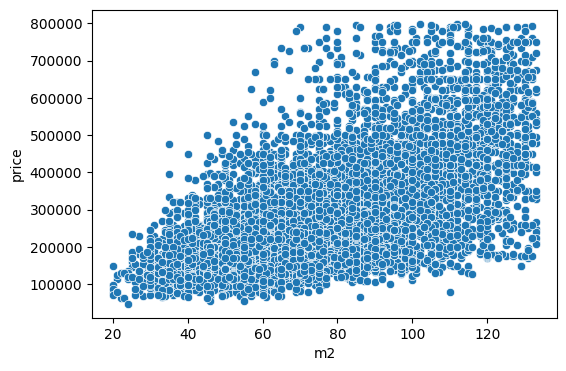

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'm2',
    y = 'price',
    data= df_ad_housing)
plt.show()

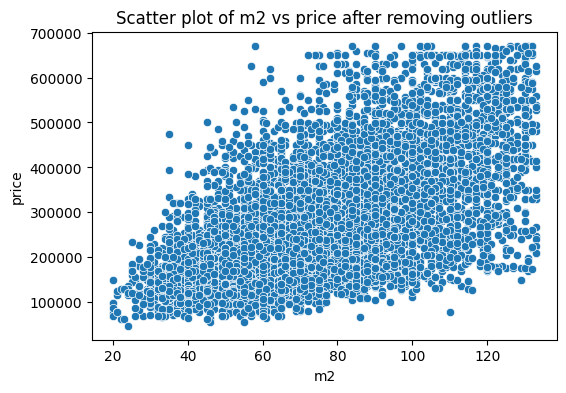

In [24]:

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df_ad_housing[['m2', 'price']].quantile(0.25)
Q3 = df_ad_housing[['m2', 'price']].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_ad_housing = df_ad_housing[
    (df_ad_housing['m2'] >= lower_bound['m2']) & (df_ad_housing['m2'] <= upper_bound['m2']) &
    (df_ad_housing['price'] >= lower_bound['price']) & (df_ad_housing['price'] <= upper_bound['price'])
]

# Plot the data after removing outliers
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='m2',
    y='price',
    data=df_ad_housing)
plt.title('Scatter plot of m2 vs price after removing outliers')
plt.show()


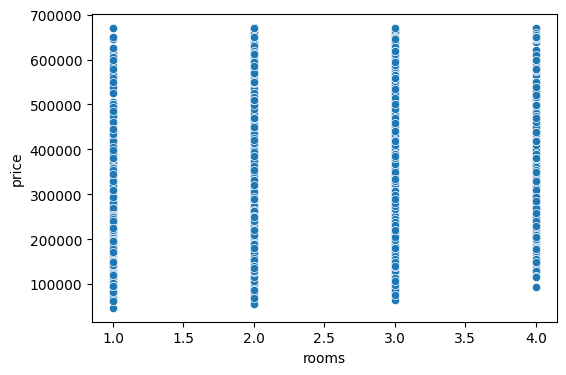

In [25]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'rooms',
    y = 'price',
    data= df_ad_housing)
plt.show()

In [26]:
#df_ad_housing['rooms'].replace(0,1,inplace=True)

In [27]:
df_ad_housing['rooms'].value_counts()

rooms
2    3004
3    2934
1    1583
4     486
Name: count, dtype: int64

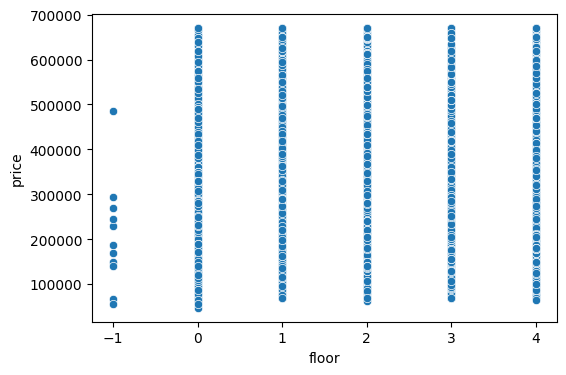

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x = 'floor',
    y = 'price',
    data= df_ad_housing)
plt.show()

In [29]:
#df_normalized = df_ad_housing.to_csv('/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/df_normalized.csv')

In [30]:
from pycaret.regression import *

In [31]:
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_ad_housing,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_components='mle',
    log_data=False,
    log_experiment=False
    )

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(8007, 10)"
4,Transformed data shape,"(8007, 36)"
5,Transformed train set shape,"(5604, 36)"
6,Transformed test set shape,"(2403, 36)"
7,Numeric features,3
8,Categorical features,4
9,Preprocess,True


In [32]:
best_models = compare_models(cross_validation=True,
                             n_select=3,
                             )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,39123.8768,3061073670.0965,55290.5913,0.8368,0.1973,0.1549,0.3040
et,Extra Trees Regressor,39929.3572,3360069940.1079,57928.3777,0.8207,0.2067,0.1583,0.1890
rf,Random Forest Regressor,40690.4162,3374418815.9318,58047.8305,0.8202,0.2062,0.1612,0.1990
gbr,Gradient Boosting Regressor,42668.5099,3519013647.9141,59261.8158,0.8124,0.2122,0.1699,0.1050
lasso,Lasso Regression,48930.7579,4213255029.7192,64875.5863,0.7755,0.3573,0.2094,0.0760
ridge,Ridge Regression,48930.2061,4213233344.2097,64875.4208,0.7755,0.3561,0.2094,0.0340
llar,Lasso Least Angle Regression,48930.7899,4213258745.7437,64875.6146,0.7755,0.3573,0.2094,0.0350
br,Bayesian Ridge,48922.0886,4213353608.2874,64876.3047,0.7755,0.3471,0.2093,0.0350
lr,Linear Regression,48943.2650,4215594859.8667,64893.4012,0.7754,0.3598,0.2095,0.3470
knn,K Neighbors Regressor,46312.5224,4236434123.1552,65067.3021,0.7742,0.2320,0.1834,0.0370


Processing:   0%|          | 0/79 [00:00<?, ?it/s]

In [33]:
best_model = stack_models(best_models, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,38518.9018,3007707585.8548,54842.5709,0.8520,0.1916,0.1492
1,38350.4148,2880173041.8472,53667.2437,0.8454,0.1898,0.1498
2,39681.1650,3301585125.8480,57459.4216,0.8230,0.2007,0.1553
3,38967.4790,3315972776.7945,57584.4838,0.8245,0.1999,0.1563
4,39621.8159,3150225599.9535,56126.8706,0.8241,0.1926,0.1491
5,37374.0116,2989374410.6573,54675.1718,0.8510,0.1913,0.1473
6,37174.7817,2974814734.6780,54541.8622,0.8357,0.1958,0.1477
7,37211.4944,2841715352.9784,53307.7420,0.8412,0.1968,0.1525
8,38032.1573,2677076045.1022,51740.4682,0.8491,0.1959,0.1548


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
#et = create_model('et')
#lbgm = create_model('lightgbm')

In [35]:
# ensemble with bagging
#ensemble_model_ = ensemble_model(et, method = 'Bagging')

In [36]:
# ensemble with boosting
#ensemble_model_ = ensemble_model(et, method = 'Boosting')

In [37]:
# blend top 3 models
#blend_model_ = blend_models(best_models)

In [38]:
holdout_pred = predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,36137.1952,2599917499.4584,50989.3861,0.8516,0.1911,0.1495


In [39]:
# show predictions df
holdout_pred[['price','prediction_label']].head()

,price,prediction_label
14690,137000,157203.014527
11882,179000,164297.542454
6300,299999,397345.538420
11837,135000,165211.169505
14780,151000,175793.515483


In [40]:
holdout_pred['difference'] = abs(holdout_pred['price'] - holdout_pred['prediction_label'])
holdout_pred[['price','prediction_label','difference']].describe()

,price,prediction_label,difference
count,2403.000000,2403.000000,2403.000000
mean,262343.349979,262944.589824,36137.195241
std,132375.213534,122508.573020,35979.985352
min,56000.000000,79079.802299,1.407104
25%,159000.000000,164029.335085,10765.609949
50%,225000.000000,229201.055368,25796.853384
75%,340000.000000,340331.133207,49089.886835
max,670900.000000,627494.153000,347717.852934


<Axes: xlabel='difference'>

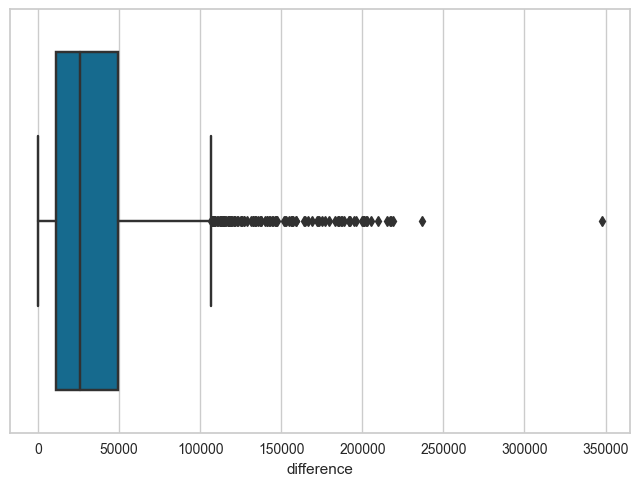

In [41]:
sns.boxplot(
    data=holdout_pred,
    x='difference'
)

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(holdout_pred['price'], holdout_pred['prediction_label'])

36137.19524096124

In [43]:
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(holdout_pred['price'], holdout_pred['prediction_label']))
print(RMSE)

50989.38614514165


In [44]:
from sklearn.metrics import explained_variance_score
explained_variance_score(holdout_pred['price'], holdout_pred['prediction_label'])

0.8515888263365989

In [45]:
NRMSE = RMSE/(max(holdout_pred['price']) - min(holdout_pred['price']))
print('NRMSE: ', NRMSE)

NRMSE:  0.08292305439118824


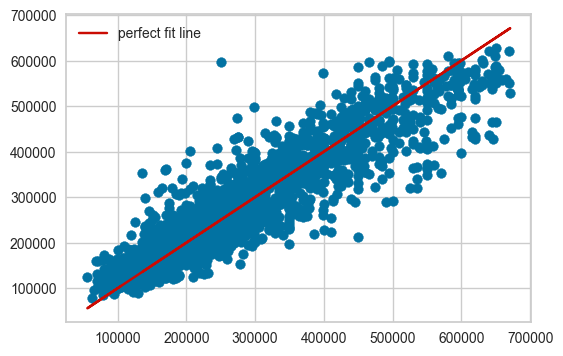

In [46]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(holdout_pred['price'], holdout_pred['prediction_label']);

# Perfect predictions
plt.plot(holdout_pred['price'], holdout_pred['price'], color='r', label='perfect fit line')
plt.legend()